In [1]:
import pandas as pd

import numpy as np

from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('wine.csv')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [4]:
data.dropna(inplace=True)

In [5]:
target = data.quality

In [6]:
target.unique()

array([5., 6., 7., 4., 8., 3.])

In [7]:
data.drop(['quality'], axis = 1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2


# SCALING THE DATA


In [8]:
from sklearn.preprocessing import minmax_scale

In [9]:
data = minmax_scale(data)

# SPLITTING INTO TRAIN AND TEST SETS

In [10]:

from sklearn.model_selection import train_test_split

In [11]:
trainx, testx, trainy, testy = train_test_split(data, target, shuffle = True, train_size = 0.7)

# REDUCING THE DIMENTIONS OF THE DATA

In [12]:
from sklearn.decomposition import PCA

In [13]:
red = PCA(n_components = 4)

In [14]:
red.fit(data)

PCA(n_components=4)

In [15]:
x = red.transform(trainx)

In [16]:
y = red.transform(testx)

# DecisionTreeClassifier

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
model2 = DecisionTreeClassifier(max_depth = 10)

In [19]:
model2.fit(x, trainy)

DecisionTreeClassifier(max_depth=10)

In [20]:
preds = model2.predict(y)

In [21]:
accuracy_score(preds, testy)

0.9018789144050104

# RandomForestClassifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
model3 = RandomForestClassifier(max_depth = 14,  n_estimators = 150)

In [24]:
model3.fit(x, trainy)

RandomForestClassifier(max_depth=14, n_estimators=150)

In [25]:
accuracy_score(model3.predict(y), testy)

0.9311064718162839

# K-Nearest Neighbour 

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
mm = KNeighborsClassifier(n_neighbors = 5)

In [28]:
mm.fit(trainx, trainy)

KNeighborsClassifier()

In [29]:
accuracy_score(mm.predict(testx), testy)

0.906054279749478

# CHECKING FOR OUTLIERS 

In [30]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1c68d2c85e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c68d2c8b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c68d2c8340>,
 'medians': [<matplotlib.lines.Line2D at 0x1c68d2c9060>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c68d2c9300>,
 'means': []}

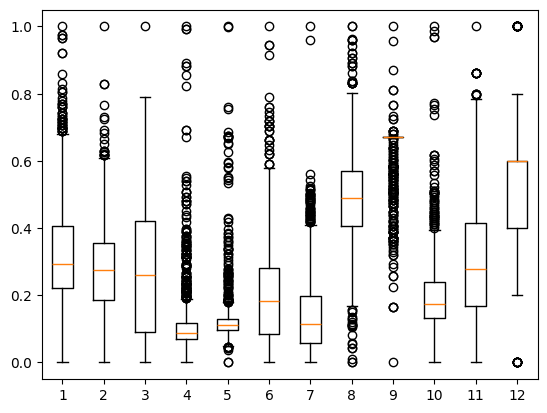

In [31]:
plt.boxplot(data)

In [32]:
df = pd.DataFrame(data)

In [33]:
df.drop([3,4,8], axis = 1, inplace = True)

# REDUCING THE DIMENTIONS OF OUTLIERS FILTERED DATA

In [34]:
pca2 = PCA(n_components = 4)

In [35]:
data = pca2.fit(df)

In [36]:
x1, x2, y1, y2 = train_test_split(df, target, shuffle = True)

# DECISION TREE 

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [118]:
dc1 = DecisionTreeClassifier(max_depth = 10)

In [119]:
trainx1 = pca2.transform(x1)

testx1 = pca2.transform(x2)

In [120]:
dc1.fit(trainx1, y1)

DecisionTreeClassifier(max_depth=10)

In [126]:
preds1 = dc1.predict(testx1)

In [127]:
accuracy_score(pp, y2)

0.9223057644110275

# RANDOM FOREST

In [154]:
rf1 = RandomForestClassifier(max_depth = 10, n_estimators = 100)

In [155]:
rf1.fit(trainx1, y1)

RandomForestClassifier(max_depth=10)

In [156]:
preds2 = rf1.predict(testx1)

In [157]:
accuracy_score(preds2, y2)

0.9624060150375939